#Análisis y Predicción de Datos Meteorológicos con Métodos de Interpolación

##JULIO RODIRGUEZ 31075856
##LUIS CHIRIVELLA 30604386

#GENERACION DE DATOS

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Warning: Module Symbolics with build ID ffffffff-ffff-ffff-0001-94c8a4970dd1 is missing from the cache.
│ This may mean Symbolics [0c5d862f-8b57-4792-8d23-62f2024744c7] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948


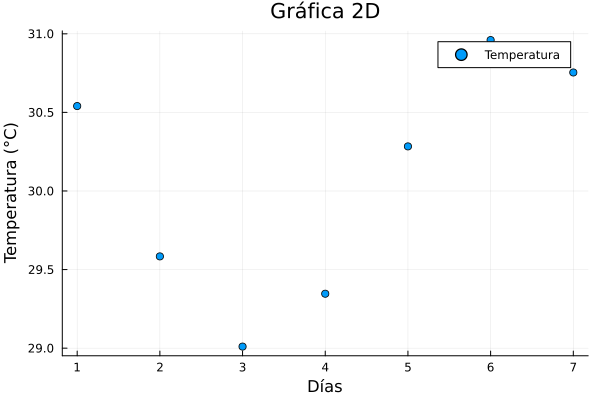

In [1]:
using SymPy
using Pkg
using Plots
using LinearAlgebra
using Symbolics

# Gráfica 2D
temps = []
for i in 1:7
    global temps
    push!(temps,cos(i) + 30)
end

x1 = 1:length(temps)
y1 = temps

scatter(x1, y1, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Gráfica 2D")

#TAYLOR

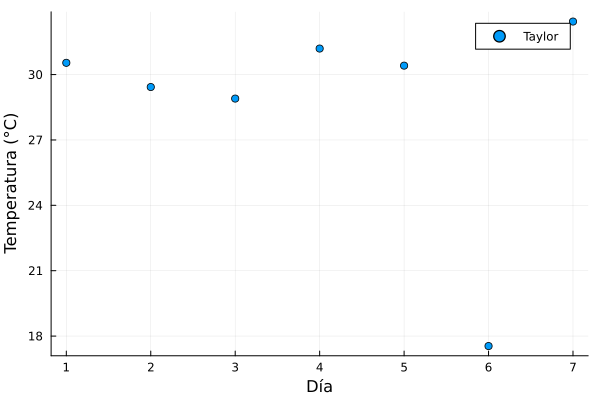

In [29]:
# Taylor
temps1 = []
c = 1
x = symbols("x")
f = cos(x)+30
t = f.subs(x,c)
for n in 1:7
    global f
    global t
    global temps1
    global c
    global x
    global temps
    d = diff(f,x)
    t =  t + d.subs(x,c) * ((x - c)^n) / factorial(n)
    f = d
    push!(temps1, t.subs(x,x1[n]))
end

scatter(x1, temps1, label="Taylor", xlabel="Día", ylabel="Temperatura (°C)")

#LAGRANGE

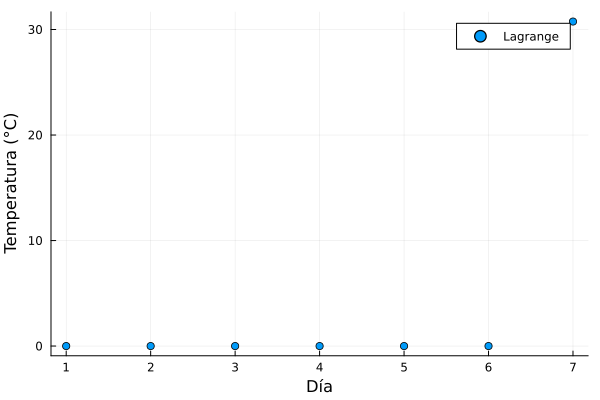

In [43]:
# Lagrange
x = [1, 2, 3, 4, 5, 6, 7]
y = temps
n = length(x)
xi = symbols("xi")
yi = 0
temps2 = []
for i in 1:n
    p = 1
    global yi
    global temps2
    for j in 1:n
        if i!= j
            p *= (xi - x[j]) / (x[i] - x[j])
        end
    end
    yi += p * y[i]
    push!(temps2, yi.subs(xi,x[n]))
end

scatter(x1, temps2, label="Lagrange", xlabel="Día", ylabel="Temperatura (°C)")

#HERMITE

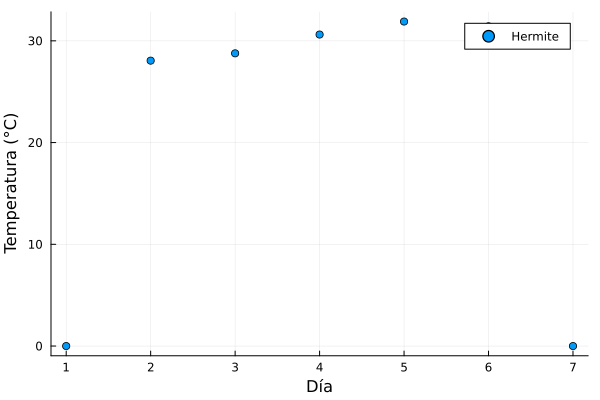

In [7]:
# Hermite

function interpolacion_hermite(temperaturas, days)

    n = length(days)


    inter_temp = zeros(n)

    for i in 2:n-1

        d_11 = (temperaturas[i+1] - temperaturas[i]) / (days[i+1] - days[i])
        d_12 = (temperaturas[i] - temperaturas[i-1]) / (days[i] - days[i-1])

        d_21 = (d_11 - (temperaturas[i+1] - temperaturas[i]) / (days[i+1] - days[i])) / (days[i+1] - days[i])
        d_22 = (d_12 - (temperaturas[i] - temperaturas[i-1]) / (days[i] - days[i-1])) / (days[i] - days[i-1])

        inter_temp[i] = temperaturas[i] + (d_11 + d_12) * (days[i] - days[i-1]) + (d_21 + d_22) * ((days[i] - days[i-1])^2)
    end

    return inter_temp
end

y_hermite = interpolacion_hermite(temps, x1)
scatter(x1, y_hermite, label="Hermite", xlabel="Día", ylabel="Temperatura (°C)")

#A TROZOS

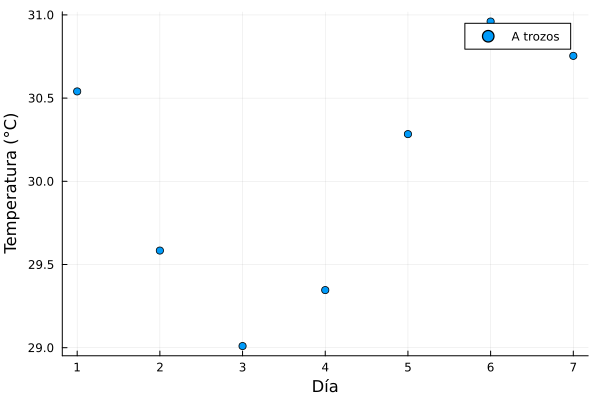

In [8]:
# A trozos
function interpolacion_a_trozos(x, y, xx)
    n = length(x)
    m = length(xx)
    yy = similar(xx)

    for i in 1:m
        if xx[i] <= x[1]
            yy[i] = y[1]
        elseif xx[i] >= x[n]
            yy[i] = y[n]
        else
            for j in 1:n-1
                if xx[i] >= x[j] && xx[i] <= x[j+1]
                    yy[i] = y[j] + (xx[i] - x[j]) * (y[j+1] - y[j]) / (x[j+1] - x[j])
                    break
                end
            end
        end
    end
    return yy
end

xd = [1,2,3,4,5,6,7]
xx = [Float32(i) for i in 1:7]
yy = interpolacion_a_trozos(xd, temps, xx)
scatter(xx, yy, label="A trozos", xlabel="Día", ylabel="Temperatura (°C)")